
 Processing Scenario 4
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 356ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001D58DE3B7F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 357ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step
2/2 ━━━━━━━━━━━━━

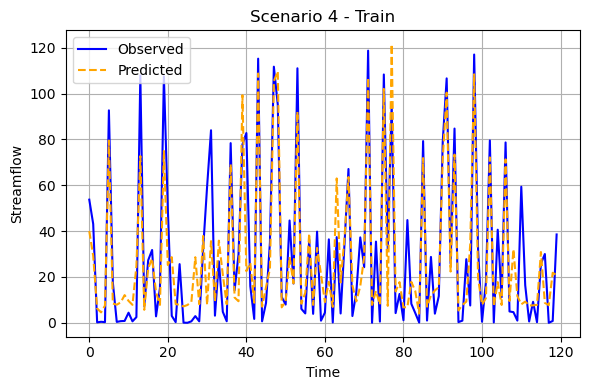

Scenario 4 - Validation - RMSE: 14.99, MAE: 11.02, R²: 0.84, NSE: 0.84


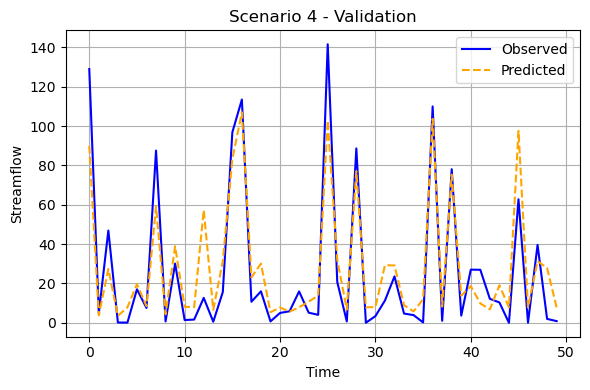

Scenario 4 - Test - RMSE: 20.22, MAE: 15.23, R²: 0.78, NSE: 0.78


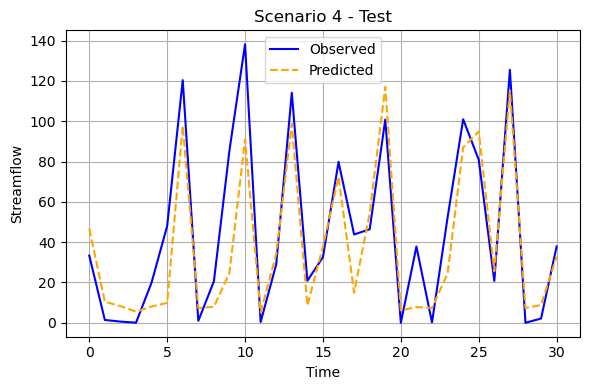


 Processing Scenario 5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 383ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 353ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 725ms/step
2

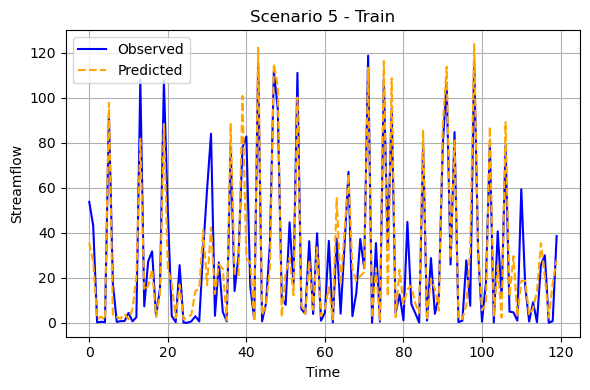

Scenario 5 - Validation - RMSE: 13.61, MAE: 8.72, R²: 0.87, NSE: 0.87


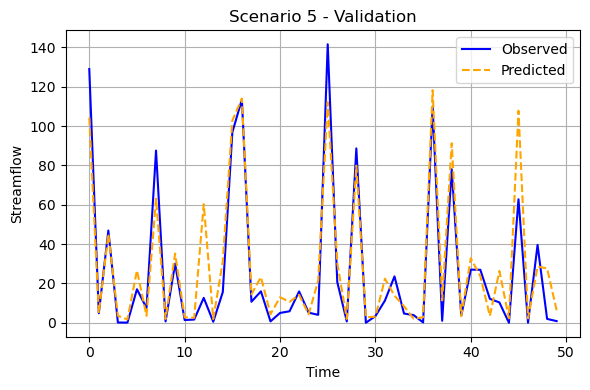

Scenario 5 - Test - RMSE: 18.45, MAE: 11.99, R²: 0.81, NSE: 0.81


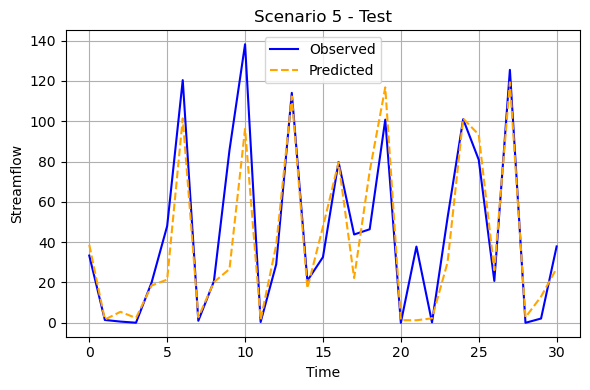

In [ ]:

# Import Required Libraries
import os  # for operating system interactions
import numpy as np  # numerical operations
import pandas as pd  # data manipulation and analysis
import matplotlib.pyplot as plt  # plotting and visualization
import tensorflow as tf  # deep learning framework
from tensorflow.keras.models import Sequential  # sequential neural network model
from tensorflow.keras.layers import GRU, Dense, Dropout, Input  # GRU layers + Dense + Dropout
from tensorflow.keras.optimizers import Adam  # Adam optimizer
from sklearn.preprocessing import MinMaxScaler  # feature normalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # evaluation metrics
from sklearn.model_selection import train_test_split  # dataset splitting
import itertools  # generate hyperparameter combinations
import warnings  # suppress warnings

# Suppress Warnings and Logs
warnings.filterwarnings("ignore", category=UserWarning)  # suppress warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # suppress TensorFlow logs except errors

# Set random seed for reproducibility
tf.random.set_seed(42)

# Evaluation Metrics
def nse(y_true, y_pred):
    # Nash-Sutcliffe Efficiency (NSE) for model performance evaluation
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

def evaluate_and_plot(y_true, y_pred, title):
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    nse_val = nse(y_true, y_pred)

    # Print results
    print(f"{title} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}, NSE: {nse_val:.2f}")

    # Plot observed vs predicted values
    plt.figure(figsize=(6, 4))
    plt.plot(y_true, label='Observed', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Streamflow')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# GRU model builder
def build_gru_model(input_shape, num_layers, num_neurons, dropout_rate, learning_rate):
    model = Sequential()  # initialize sequential model
    model.add(Input(shape=input_shape))  # input layer
    # Add GRU layers
    for i in range(num_layers):
        return_seq = i < num_layers - 1  # return sequences for intermediate layers
        model.add(GRU(num_neurons, activation='relu', return_sequences=return_seq))
        model.add(Dropout(dropout_rate))  # apply dropout for regularization
    model.add(Dense(1))  # output layer for regression
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')  # compile model
    return model

# Scenario Files (Datasets)
scenario_files = {
    'Scenario 4': 'cleaned_processed_data_scenario4.csv',
    'Scenario 5': 'cleaned_processed_data_scenario5.csv'
}

# Hyperparameter Grid
layer_options = [1, 2]  # number of GRU layers
neuron_options = [32, 64, 128]  # number of neurons per layer
dropout_options = [0.2, 0.3]  # dropout rates
learning_rates = [0.001, 0.005]  # learning rates
batch_sizes = [16, 32]  # training batch sizes
epochs_list = [100]  # number of training epochs

# Loop Through Scenarios
for scenario_name, file in scenario_files.items():
    print(f"\n Processing {scenario_name}")

    # Load dataset
    df = pd.read_csv(file)
    df = df.drop(columns=['Date'])  # Drop date column as it is not needed for modelling phase

    # Split into features (X) and target (y)
    X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

    
    # Split data into 60% train set, 25% validation set, and 15% test set
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2941, random_state=42)

    # MinMaxScaler transforms data to a range between 0 and 1 - helps the model learn more efficiently and reduces bias from large values
    scaler_X = MinMaxScaler()  # Scaler for input features
    scaler_y = MinMaxScaler()  # Scaler for target feature

    # Fit scalers on training data only
    X_train_scaled = scaler_X.fit_transform(X_train)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

    # Transform validation and test data using training scalers
    X_val_scaled = scaler_X.transform(X_val)
    y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1)).ravel()
    X_test_scaled = scaler_X.transform(X_test)
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

    # Reshape for GRU input: [samples, time steps, features]
    X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_val_scaled = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
    X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Define input shape for thr model as time ste;s, features
    input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])

    # Hyperparameter search
    best_rmse = float('inf')
    best_model = None
    best_config = None
    
    # Loop through all hyperparameter combinations
    for config in itertools.product(layer_options, neuron_options, dropout_options, learning_rates, batch_sizes, epochs_list):
        num_layers, num_neurons, dropout_rate, lr, batch_size, epochs = config

        # Build and train GRU model
        model = build_gru_model(input_shape, num_layers, num_neurons, dropout_rate, lr)
        model.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), epochs=epochs, batch_size=batch_size, verbose=0)

        # Predict on validation set
        y_val_pred = scaler_y.inverse_transform(model.predict(X_val_scaled))
        y_val_true = scaler_y.inverse_transform(y_val_scaled.reshape(-1, 1))

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))

        # Save best model 
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_config = config
            
    # Print best config
    print(f"\n Best Config for {scenario_name}: Layers={best_config[0]}, Neurons={best_config[1]}, Dropout={best_config[2]}, LR={best_config[3]}, Batch={best_config[4]}, Epochs={best_config[5]}")

    # Final evaluation predictions
    y_train_pred = scaler_y.inverse_transform(best_model.predict(X_train_scaled))
    y_val_pred = scaler_y.inverse_transform(best_model.predict(X_val_scaled))
    y_test_pred = scaler_y.inverse_transform(best_model.predict(X_test_scaled))

    y_train_true = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1))
    y_val_true = scaler_y.inverse_transform(y_val_scaled.reshape(-1, 1))
    y_test_true = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

    evaluate_and_plot(y_train_true, y_train_pred, f"{scenario_name} - Train")
    evaluate_and_plot(y_val_true, y_val_pred, f"{scenario_name} - Validation")
    evaluate_and_plot(y_test_true, y_test_pred, f"{scenario_name} - Test")

: 